![](https://i.ibb.co/WGtZTVb/titlecolab.png)
![](http://python.lycee.free.fr/_images/python-logo.png)

# Ekimetrics Python Training
## Part 2 : Pandas basics

This is the 2nd part of the Python training. <br>
You will here learn how to **manipulate structured data such as Excel spreadsheets**. 

- last updated date: 2019/04/01
- author: Ekimetrics
- questions to: theo.alvesdacosta@ekimetrics.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Summary
- Pandas
- Dataframes in Pandas
- Properties of dataframe
- Accessing to data
- Creating columns
- Filtering dataframes
- Operations on Series
- Visualizing data

**GENERATING SAMPLE DATA**<br>
👌 Warning,  don't forget to launch this cell,  you will need it later

In [ ]:
#@title
def generate_profit_by_country():

    np.random.seed(42)

    date = ["2015-0{}-01".format(x) for x in range(1,13)]
    date += ["2016-0{}-01".format(x) for x in range(1,13)]
    date = [x.replace("011","11").replace("012","12").replace("010","10") for x in date]

    def generate_data():


        start = np.random.randint(5000,15000)
        fluctu = np.random.randint(300,2000)
        coef = np.random.randint(-1000,1000)
        choice = np.random.choice([0,1])
        if choice == 0:
            values = [start + coef * i + np.random.normal(0,fluctu) for i in range(len(date))]
        elif choice == 1:
            values = [start + fluctu*np.cos(i) + np.random.normal(0,fluctu) for i in range(len(date))]
        return values

    values = []
    dates = []
    countries = []
    products = []

    for country in ["UK","France","Germany","China","USA","Italy","Spain","Japan"]:
        for product in ["Product A","Product B","Product C","Product D","Product E"]:
            dates.extend(date)
            values.extend(generate_data())
            countries.extend([country]*len(date))
            products.extend([product]*len(date))

    data = pd.DataFrame()
    data["Date"] = dates
    data["Country"] = countries
    data["Product"] = products
    data["Profit"] = values
    
    return data
  
  
def generate_population_by_country_code():
  
  data = {
      "UK":[50*1e6],
      "FRA":[70*1e6],
      "GER":[80*1e6],
      "CHI":[2000*1e6],
      "USA":[350*1e6],
      "ITA":[40*1e6],
      "SPA":[45*1e6],
      "JAP":[70*1e6],
  }
  
  data = pd.DataFrame(data).T
  data.reset_index(inplace = True)
  data.columns = ["country_code","population"]
  return data


***
# Working with structured data

## Pandas

![](https://media.giphy.com/media/l4JyOCHKxB3NkXKMw/giphy.gif)

## Dataframes in Pandas

### Creating data

In [ ]:
df = pd.DataFrame()
df["A"] = [1,2,3]
df["B"] = ["A","B","C"]
df["C"] = [7,12.2,"J"]
df["D"] = [[1,2],2,3]
df

,A,B,C,D
0,1,A,7,"[1, 2]"
1,2,B,12.2,2
2,3,C,J,3


### Reading data

#### Reading csv files

In [ ]:
# In the colaboratory environment we will not read the data from a file but reconstruct it
# If you have an error launch the cell at the beginning of this notebook

try:
  profit_by_country = pd.read_csv("/data/profit_by_country.csv")
except:
  profit_by_country = generate_profit_by_country()
  
profit_by_country.head()

,Date,Country,Product,Profit
0,2015-01-01,UK,Product A,13409.284139
1,2015-02-01,UK,Product A,14809.009517
2,2015-03-01,UK,Product A,11578.124214
3,2015-04-01,UK,Product A,11438.153093
4,2015-05-01,UK,Product A,14487.835342


#### Reading excel files

In [ ]:
# In the colaboratory environment we will not read the data from a file but reconstruct it
# If you have an error launch the cell at the beginning of this notebook

try:
  pop_by_country_code = pd.read_excel("Data/population_by_country_code.xlsx")
except:
  pop_by_country_code = generate_population_by_country_code()

pop_by_country_code.head()

,country_code,population
0,CHI,2.000000e+09
1,FRA,7.000000e+07
2,GER,8.000000e+07
3,ITA,4.000000e+07
4,JAP,7.000000e+07


#### Reading other data sources
- SQL (see Ekimetrics library)
- Json 
- etc ...

***
# The basics of dataframes manipulation

## Properties

In [ ]:
profit_by_country.describe()

,Profit
count,960.000000
mean,7665.895038
std,5303.848817
min,-14014.287837
25%,5387.048578
50%,8925.121788
75%,11311.898286
max,20083.896833


In [ ]:
profit_by_country.columns

Index(['Date', 'Country', 'Product', 'Profit'], dtype='object')

In [ ]:
profit_by_country.shape

(960, 4)

In [ ]:
print(profit_by_country["Country"].unique())
print(profit_by_country["Product"].unique())

['UK' 'France' 'Germany' 'China' 'USA' 'Italy' 'Spain' 'Japan']
['Product A' 'Product B' 'Product C' 'Product D' 'Product E']


In [ ]:
profit_by_country["Country"].value_counts()

China      120
Italy      120
Spain      120
Japan      120
France     120
Germany    120
USA        120
UK         120
Name: Country, dtype: int64

## Accessing data

### Accessing one column : Series

In [ ]:
profit_by_country["Country"].head()

0    UK
1    UK
2    UK
3    UK
4    UK
Name: Country, dtype: object

### Accessing multiple columns : DataFrame

In [ ]:
profit_by_country[["Country","Product"]].head()

,Country,Product
0,UK,Product A
1,UK,Product A
2,UK,Product A
3,UK,Product A
4,UK,Product A


### Accessing data using .iloc[row,column]

In [ ]:
profit_by_country.iloc[0]

Date       2015-01-01
Country            UK
Product     Product A
Profit        13409.3
Name: 0, dtype: object

In [ ]:
profit_by_country.iloc[:,0].head()

0    2015-01-01
1    2015-02-01
2    2015-03-01
3    2015-04-01
4    2015-05-01
Name: Date, dtype: object

In [ ]:
profit_by_country.iloc[0,0]

'2015-01-01'

In [ ]:
profit_by_country.iloc[:8,:]

,Date,Country,Product,Profit
0,2015-01-01,UK,Product A,13409.284139
1,2015-02-01,UK,Product A,14809.009517
2,2015-03-01,UK,Product A,11578.124214
3,2015-04-01,UK,Product A,11438.153093
4,2015-05-01,UK,Product A,14487.835342
5,2015-06-01,UK,Product A,12919.917689
6,2015-07-01,UK,Product A,10604.194555
7,2015-08-01,UK,Product A,12244.363117


### Accessing data with .loc[index,column]

In [ ]:
profit_by_country.index = ["Row {}".format(i) for i in range(len(profit_by_country))]
profit_by_country.head()

,Date,Country,Product,Profit
Row 0,2015-01-01,UK,Product A,13409.284139
Row 1,2015-02-01,UK,Product A,14809.009517
Row 2,2015-03-01,UK,Product A,11578.124214
Row 3,2015-04-01,UK,Product A,11438.153093
Row 4,2015-05-01,UK,Product A,14487.835342


In [ ]:
profit_by_country.loc["Row 1"]

Date       2015-02-01
Country            UK
Product     Product A
Profit          14809
Name: Row 1, dtype: object

In [ ]:
profit_by_country.loc["Row 1","Product"]

'Product A'

In [ ]:
profit_by_country.loc[["Row 1","Row 38"],"Product"]

Row 1     Product A
Row 38    Product B
Name: Product, dtype: object

## Creating columns

In [ ]:
profit_copy = profit_by_country.copy()

### From one element

In [ ]:
profit_copy["Test 1"] = 12
profit_copy["Test 2"] = "hello"
profit_copy.head()

,Date,Country,Product,Profit,Test 1,Test 2
Row 0,2015-01-01,UK,Product A,13409.284139,12,hello
Row 1,2015-02-01,UK,Product A,14809.009517,12,hello
Row 2,2015-03-01,UK,Product A,11578.124214,12,hello
Row 3,2015-04-01,UK,Product A,11438.153093,12,hello
Row 4,2015-05-01,UK,Product A,14487.835342,12,hello


### From lists

In [ ]:
profit_copy["Test 3"] = [i for i in range(len(profit_copy))]
profit_copy.head()

,Date,Country,Product,Profit,Test 1,Test 2,Test 3
Row 0,2015-01-01,UK,Product A,13409.284139,12,hello,0
Row 1,2015-02-01,UK,Product A,14809.009517,12,hello,1
Row 2,2015-03-01,UK,Product A,11578.124214,12,hello,2
Row 3,2015-04-01,UK,Product A,11438.153093,12,hello,3
Row 4,2015-05-01,UK,Product A,14487.835342,12,hello,4


### From other columns

In [ ]:
profit_copy["Profit * 3"] = profit_copy["Profit"] * 3
profit_copy["Country Product"] = profit_copy["Country"] + profit_copy["Product"]
profit_copy.head()

,Date,Country,Product,Profit,Test 1,Test 2,Test 3,Profit * 3,Country Product
Row 0,2015-01-01,UK,Product A,13409.284139,12,hello,0,40227.852416,UKProduct A
Row 1,2015-02-01,UK,Product A,14809.009517,12,hello,1,44427.028552,UKProduct A
Row 2,2015-03-01,UK,Product A,11578.124214,12,hello,2,34734.372642,UKProduct A
Row 3,2015-04-01,UK,Product A,11438.153093,12,hello,3,34314.459278,UKProduct A
Row 4,2015-05-01,UK,Product A,14487.835342,12,hello,4,43463.506027,UKProduct A


### Application with the function to_datetime to handle dates

In [ ]:
profit_by_country["Date"] = pd.to_datetime(profit_by_country["Date"])
profit_by_country.head()

,Date,Country,Product,Profit
Row 0,2015-01-01,UK,Product A,13409.284139
Row 1,2015-02-01,UK,Product A,14809.009517
Row 2,2015-03-01,UK,Product A,11578.124214
Row 3,2015-04-01,UK,Product A,11438.153093
Row 4,2015-05-01,UK,Product A,14487.835342


In [ ]:
profit_by_country["Date"].iloc[0]

Timestamp('2015-01-01 00:00:00')

## Filtering dataframes

### Boolean arrays

In [ ]:
(profit_by_country["Profit"] > 14000).head()

Row 0    False
Row 1     True
Row 2    False
Row 3    False
Row 4     True
Name: Profit, dtype: bool

### The use of boolean arrays on filtering 

In [ ]:
profit_by_country.loc[profit_by_country["Profit"] < 2000].head()

,Date,Country,Product,Profit
Row 31,2015-08-01,UK,Product B,875.081907
Row 32,2015-09-01,UK,Product B,1247.584961
Row 33,2015-10-01,UK,Product B,-1783.847937
Row 34,2015-11-01,UK,Product B,-2166.464002
Row 35,2015-12-01,UK,Product B,-1703.769271


In [ ]:
profit_by_country.loc[profit_by_country["Product"] == "Product B"].head()

,Date,Country,Product,Profit
Row 24,2015-01-01,UK,Product B,8321.795799
Row 25,2015-02-01,UK,Product B,7634.057713
Row 26,2015-03-01,UK,Product B,6360.785545
Row 27,2015-04-01,UK,Product B,7702.255163
Row 28,2015-05-01,UK,Product B,4957.231625


In [ ]:
profit_by_country.loc[(profit_by_country["Product"] == "Product B") & (profit_by_country["Date"] < "2015-03-01")].head()

,Date,Country,Product,Profit
Row 24,2015-01-01,UK,Product B,8321.795799
Row 25,2015-02-01,UK,Product B,7634.057713
Row 144,2015-01-01,France,Product B,10183.708422
Row 145,2015-02-01,France,Product B,10986.741127
Row 264,2015-01-01,Germany,Product B,11362.777745


## Operations on Series

In [ ]:
print(profit_by_country["Profit"].sum())
print(profit_by_country["Profit"].mean())
print(profit_by_country["Profit"].std())

7359259.236438815
7665.895037957099
5303.8488172730185


## Visualizing data

In [ ]:
profit_UK_Product_B = profit_by_country.loc[(profit_by_country["Country"] == "UK") & (profit_by_country["Product"] == "Product B")]
profit_UK_Product_B.head()

,Date,Country,Product,Profit
Row 24,2015-01-01,UK,Product B,8321.795799
Row 25,2015-02-01,UK,Product B,7634.057713
Row 26,2015-03-01,UK,Product B,6360.785545
Row 27,2015-04-01,UK,Product B,7702.255163
Row 28,2015-05-01,UK,Product B,4957.231625


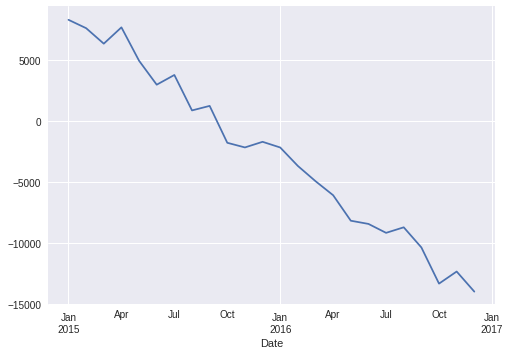

In [ ]:
profit_UK_Product_B.set_index("Date")["Profit"].plot()
plt.show()

<h2 style = "color:#BF0000"><u>Exercises 1 : playing with the data</u></h2><br>

##### Total profit in the USA in the 2015 ?

##### Average profit per month for product A in Italy ?

##### Plot profit on product C in 2016 for France and UK?